<a href="https://colab.research.google.com/github/gib-hub/Python4/blob/main/python4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#**1. Perhitungan Daya Terima**


**1.1 Fungsi**

In [ ]:
#Diketahui
Ptx_mW = 30000 #Power transmitter (Watt)
Gtx = 10 #Gain transmitter (dB)
Grx = 2 #Gain receiver (dB)
#PL = #Path Loss (dB) - belum dicari

#Ubah Ptx dari mWatt(numerik) ke dBm(logaritmik) 
Ptx = 10*np.log10(Ptx_mW)


#Cari nilai PL (Path Loss)
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    PL = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    return PL


#cari nilai d (jarak (meter))
ht=80 #tinggi tower (meter)
hr=1.5 #tinggi user (meter)
dmin=300 #jarak minimal (meter)
dmax=1000 #jarak maksimal (meter)
N=200 #jumlah user
d=np.random.randint(dmin,dmax,N)


#Cari nilai PL (Path Loss) pada Urban, Sub Urban, dan Open
PLurban = cos(1800, 'urban', 80, 1.5, d)
PLsuburban = cos(1800, 'suburban', 80, 1.5, d)
PLopen = cos(1800, 'open', 80, 1.5, d)


#fungsi buat cari Prx
def dayaTerima(Ptx,PL,Gtx,Grx):
  Prx = Ptx - PL + Gtx + Grx

  #Prx logaritmik (dBm) ubah ke numerik (mWatt)
  Prx_mW = 10**(Prx/10)
  return Prx_mW


#Mencari daya terima di Urban, Sub Urban, dan Open
dayaTerimaUrban = dayaTerima(Ptx,PLurban,Gtx,Grx)
dayaTerimaSubUrban = dayaTerima(Ptx,PLsuburban,Gtx,Grx)
dayaTerimaOpen = dayaTerima(Ptx,PLopen,Gtx,Grx)


**1.2 Grafik variasi lokasi (urban, suburban, open) dengan frekuensi 1800 MHz** 


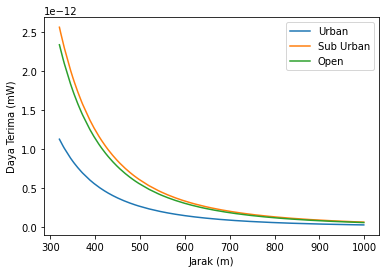

In [ ]:
#Merapikan grafik
d_sort=d[(np.argsort(d))]
Urban_sort=dayaTerimaUrban[np.argsort(d)]
SubUrban_sort=dayaTerimaSubUrban[np.argsort(d)]
Open_sort=dayaTerimaOpen[np.argsort(d)]

#Plot Urban, Sub Urban, dan Open
plt.figure()
plt.plot(d_sort,Urban_sort,  label='Urban')
plt.plot(d_sort,SubUrban_sort,  label='Sub Urban')
plt.plot(d_sort,Open_sort,  label='Open')

#Label
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

**1.3 Grafik variasi frekuensi (700 MHz, 900 MHz, 1800 MHz) dengan lokasi Urban**


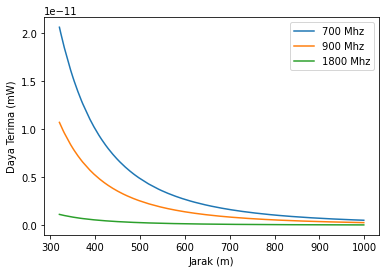

In [ ]:
f1=700
f2=900
f3=1800

PLurban1 = cos(f1, 'urban', 80, 1.5, d)
PLurban2 = cos(f2, 'urban', 80, 1.5, d)
PLurban3 = cos(f3, 'urban', 80, 1.5, d)

dayaTerimaUrban1 = dayaTerima(Ptx,PLurban1,Gtx,Grx)
dayaTerimaUrban2 = dayaTerima(Ptx,PLurban2,Gtx,Grx)
dayaTerimaUrban3 = dayaTerima(Ptx,PLurban3,Gtx,Grx)

d_sort=d[(np.argsort(d))]
Urban_sort1=dayaTerimaUrban1[np.argsort(d)]
Urban_sort2=dayaTerimaUrban2[np.argsort(d)]
Urban_sort3=dayaTerimaUrban3[np.argsort(d)]

plt.figure()
plt.plot(d_sort,Urban_sort1,  label='700 Mhz')
plt.plot(d_sort,Urban_sort2,  label='900 Mhz')
plt.plot(d_sort,Urban_sort3,  label='1800 Mhz')

plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()


#**2. Perhitungan Signal to Noise Ratio (SNR)**

**2.1 Fungsi**

In [ ]:
BW = 5000000 #Bandwith sistem (Hz)

def SNR(Prx,BW):
  #Cari dulu nilai noise
  #Noise = -174 (dBm/Hz) + 10*10log(BW) (hasil noise dalam logaritmik(dB))
  noise_dB = -174 + (10*np.log10(BW))

  #ubah noise ke numerik(Watt)
  noise = 1.9905358528e-11

  #cari SNR
  SNR = Prx / noise
  return SNR



**2.2 Grafik variasi lokasi (urban, suburban, open) dengan frekuensi 1800 MHz :**


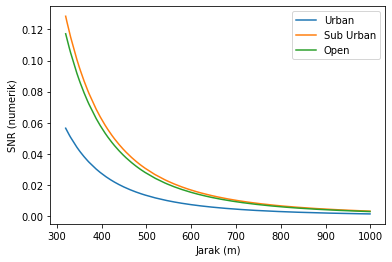

In [ ]:
SNRurban = SNR(dayaTerimaUrban,BW)
SNRsuburban = SNR(dayaTerimaSubUrban,BW)
SNRopen = SNR(dayaTerimaOpen,BW)


d_sort=d[(np.argsort(d))]
Urban_sort=SNRurban[np.argsort(d)]
SubUrban_sort=SNRsuburban[np.argsort(d)]
Open_sort=SNRopen[np.argsort(d)]


plt.figure()
plt.plot(d_sort,Urban_sort,  label='Urban')
plt.plot(d_sort,SubUrban_sort,  label='Sub Urban')
plt.plot(d_sort,Open_sort,  label='Open')


plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (numerik)')
plt.show()


**2.3 Grafik variasi frekuensi (700 MHz, 900 MHz, 1800 MHz) dengan lokasi Urban**


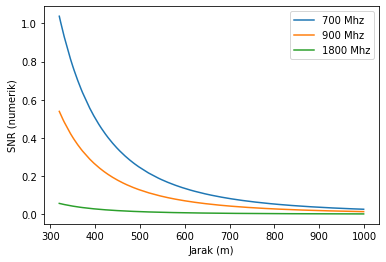

In [ ]:
SNR1 = SNR(dayaTerimaUrban1,BW)
SNR2 = SNR(dayaTerimaUrban2,BW)
SNR3 = SNR(dayaTerimaUrban3,BW)


d_sort=d[(np.argsort(d))]
Urban_sort1=SNR1[np.argsort(d)]
Urban_sort2=SNR2[np.argsort(d)]
Urban_sort3=SNR3[np.argsort(d)]


plt.figure()
plt.plot(d_sort,Urban_sort1,  label='700 Mhz')
plt.plot(d_sort,Urban_sort2,  label='900 Mhz')
plt.plot(d_sort,Urban_sort3,  label='1800 Mhz')


plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (numerik)')
plt.show()

#**3. Fungsi perhitungan kapasitas seluler**

**3.1 Fungsi**

In [ ]:
def kapasitasSeluler(SNR,BW):
  KS = BW * np.log2(1+SNR)
  return KS

**3.2 Grafik variasi lokasi (urban, suburban, open) dengan frekuensi 1800 MHz**

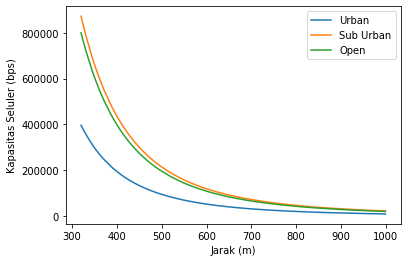

In [ ]:
KSurban = kapasitasSeluler(SNRurban,BW)
KSsuburban = kapasitasSeluler(SNRsuburban,BW)
KSopen = kapasitasSeluler(SNRopen,BW)


d_sort=d[(np.argsort(d))]
Urban_sort=KSurban[np.argsort(d)]
SubUrban_sort=KSsuburban[np.argsort(d)]
Open_sort=KSopen[np.argsort(d)]


plt.figure()
plt.plot(d_sort,Urban_sort,  label='Urban')
plt.plot(d_sort,SubUrban_sort,  label='Sub Urban')
plt.plot(d_sort,Open_sort,  label='Open')


plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas Seluler (bps)')
plt.show()

**3.3 Grafik variasi frekuensi (700 MHz, 900 MHz, 1800 MHz) dengan lokasi Urban**

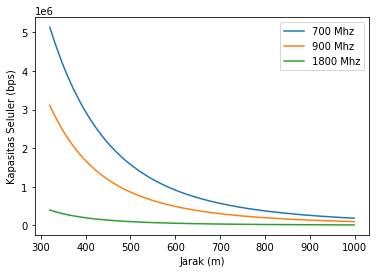

In [ ]:
KS1 = kapasitasSeluler(SNR1,BW)
KS2 = kapasitasSeluler(SNR2,BW)
KS3 = kapasitasSeluler(SNR3,BW)


d_sort=d[(np.argsort(d))]
Urban_sort1=KS1[np.argsort(d)]
Urban_sort2=KS2[np.argsort(d)]
Urban_sort3=KS3[np.argsort(d)]


plt.figure()
plt.plot(d_sort,Urban_sort1,  label='700 Mhz')
plt.plot(d_sort,Urban_sort2,  label='900 Mhz')
plt.plot(d_sort,Urban_sort3,  label='1800 Mhz')


plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas Seluler (bps)')
plt.show()